In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

# this line ensures that all models will have the same split
np.random.seed(1882)

In [2]:
XY = np.loadtxt('phishing.data', delimiter=',')
XY = XY.astype(np.int8)

In [3]:
from src.utilz import get_random_splits

datasets = get_random_splits(XY, [0.6, 0.2, 0.2], T = 10)

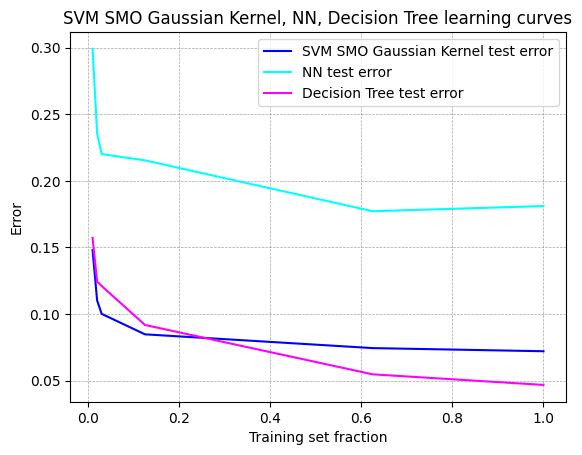

In [4]:
from src.svm import SVM_SMO
from src.kernels import GaussianKernel
from src.measures import draw_learning_curve
from src.nn import HardcodedNeuralNetwork
from src.tree import DecisionTree

training_set_fractions = [0.01, 0.02, 0.03, 0.125, 0.625, 1]

svm = SVM_SMO(C=1.0, epochs=5000, kernel=GaussianKernel(sigma=7), silent=True)
nn_architecture = [
    {"input_dim": 30, "output_dim": 32},
    {"input_dim": 32, "output_dim": 16},
    {"input_dim": 16, "output_dim": 1},
    # + sigmoid at the end
]
nn = HardcodedNeuralNetwork(
    nn_architecture=nn_architecture,
    epochs=100,
    learning_rate=0.01,
    batch_size=512,
)
tree = DecisionTree(no_features=30, max_depth=16, min_samples_split=2)

draw_learning_curve([svm, nn, tree], datasets, training_set_fractions, ['blue', 'cyan', 'magenta'],)